In [94]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
#Создаем списки средних баллов студентов и заполняем случайными числами
n = 2000
Phisycs=[]
Math = []
Chemistry = []
Thermodynamics = []
Statistic = []
Probability_theory = []
n=2000
for i in range(n):
    Phisycs.append(random.randint(0,99))
    Math.append(random.randint(0,99))
    Chemistry.append(random.randint(0,99))
    Thermodynamics.append(random.randint(0,99))
    Statistic.append(random.randint(0,99))
    Probability_theory.append(random.randint(0,99))
#Время выполнения, распределенное нормально
random_normal_time = np.random.normal(60,15,2000)
Time = np.array(random_normal_time, dtype = int).tolist()
data = {'Phisycs':Phisycs, 'Math':Math, 'Chemistry':Chemistry, 'Thermodynamics':Thermodynamics, 'Statistic':Statistic, 'Probability_theory':Probability_theory, 'Time':Time}
df = pd.DataFrame(data)
#Функция, заполняющая столбец оценок в зависимости от суммы быллов по предметам
def fill_grade(row):
    if (row['Phisycs'] + row['Math'] + row['Chemistry'] + row['Thermodynamics'] + row['Statistic'] + row['Probability_theory'])>= 400:
        return 'Отлично'
    elif 300 < (row['Phisycs'] + row['Math'] + row['Chemistry'] + row['Thermodynamics'] + row['Statistic'] + row['Probability_theory']) < 400:
        return 'Хорошо'
    else:
        return 'Удовлетворительно'
# Применение функции к каждой строке DataFrame и заполнение столбца оценок
df['Grade'] = df.apply(fill_grade, axis=1)
#Преобразуем категориальные данные в числовые
le = LabelEncoder()
le.fit(df.Grade)
df.Grade = le.transform(df.Grade)

Разбить на тестовую и обучающую выборку

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Probability_theory','Statistic', 'Phisycs']], df.Grade,test_size = 0.2, random_state=2)

Выбор признаков

<BarContainer object of 7 artists>

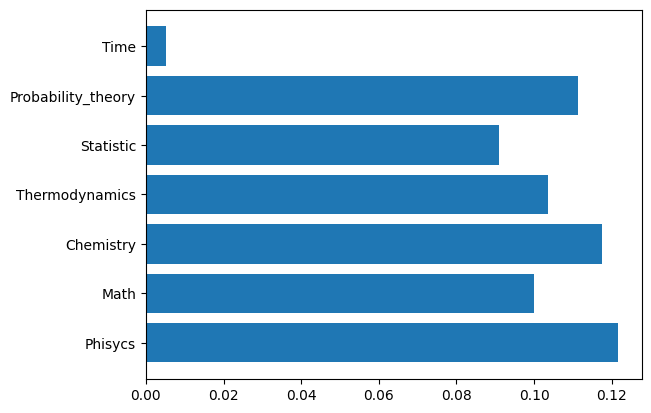

In [96]:
#выбор с помощью матрицы корелляций
df.corr()
# выбор признаков методом RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(df.drop('Grade', axis=1), df.Grade)
imp = rf.feature_importances_ - 0.05
from matplotlib import pyplot as plt
plt.barh(df.drop('Grade', axis=1).columns,imp)


Создание модели

In [97]:
pip install catboost


In [98]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations = 200, depth = 4, learning_rate = 0.1)
model.fit(x_train,y_train, silent=True)
# определяем точность модели
print(f'Точность модели: {model.score(x_test,y_test)*100}%')
# Сохраняем модель в файл
model.save_model('grade_model.cbm')

Точность модели: 65.0%


Функция, прогнозирующая оценку

In [99]:
def PredictGrade(student_scores):
    # Преобразование данных новой квартиры в DataFrame
    new_data = pd.DataFrame(student_scores)
    # Использование модели для предсказания
    predicted_grade = model.predict(new_data)[0]
    # Преобразование обратно в текстовую категорию
    if predicted_grade == 1:
      predicted_grade = 'Удовлетворительно'
    elif predicted_grade == 2:
      predicted_grade = 'Хорошо'
    else:
      predicted_grade = 'Отлично'
    return predicted_grade
first_student_scores = [{'Phisycs':100, 'Math':100, 'Chemistry':100, 'Thermodynamics':90, 'Statistic':100, 'Probability_theory':100, 'Time':45}]
second_student_scores = [{'Phisycs':0, 'Math':0, 'Chemistry':25, 'Thermodynamics':50, 'Statistic':10, 'Probability_theory':44, 'Time':70}]
grade1 = PredictGrade(first_student_scores)
grade2 = PredictGrade(second_student_scores)
print(f'Прогнозируемая оценка первого студента: {grade1}')
print(f'Прогнозируемая оценка второго студента: {grade2}')

Прогнозируемая оценка первого студента: Хорошо
Прогнозируемая оценка второго студента: Удовлетворительно
